<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/Week7/%EC%98%81%ED%99%94%EA%B4%80%EA%B0%9D%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv('/content/movies_train.csv')
test=pd.read_csv('/content/movies_test.csv')
submission=pd.read_csv('/content/submission.csv')

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [104]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [105]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [106]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [107]:
#결측치 많은 데이터 제거
train=train.drop(['dir_prev_bfnum'],axis=1)
test=test.drop(['dir_prev_bfnum'],axis=1)

In [108]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [109]:
#감독명:다양해서 제거
train=train.drop(['director'],axis=1)
test=test.drop(['director'],axis=1)

In [110]:
train.describe(include='all')

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600.000000,600,600.000000,600.000000,600.000000,6.000000e+02
unique,169,12,330,NaN,4,NaN,NaN,NaN,NaN
top,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,NaN,NaN,NaN,NaN
freq,54,221,6,NaN,204,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,100.863333,NaN,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,18.097528,NaN,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,45.000000,NaN,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,89.000000,NaN,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,100.000000,NaN,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,114.000000,NaN,2.000000,264.000000,4.000000,4.798868e+05


<function matplotlib.pyplot.show>

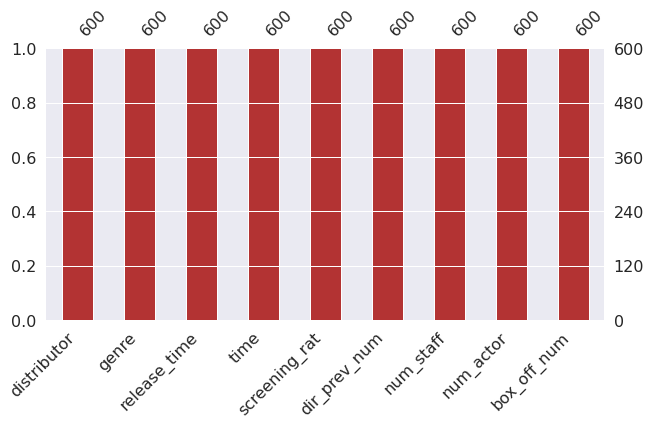

In [111]:
import missingno as msno
msno.bar(train,figsize=(10,5),color=(0.7,0.2,0.2))
plt.show

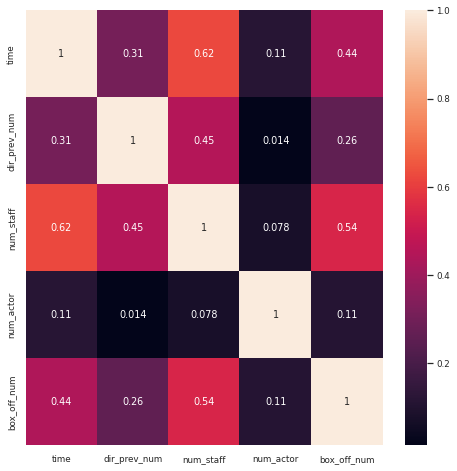

In [112]:
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True, cbar=True);
plt.show()

In [113]:
corr_mat=train.corr()
corr_mat['box_off_num'].sort_values(ascending=False)

box_off_num     1.000000
num_staff       0.544265
time            0.441452
dir_prev_num    0.259674
num_actor       0.111179
Name: box_off_num, dtype: float64

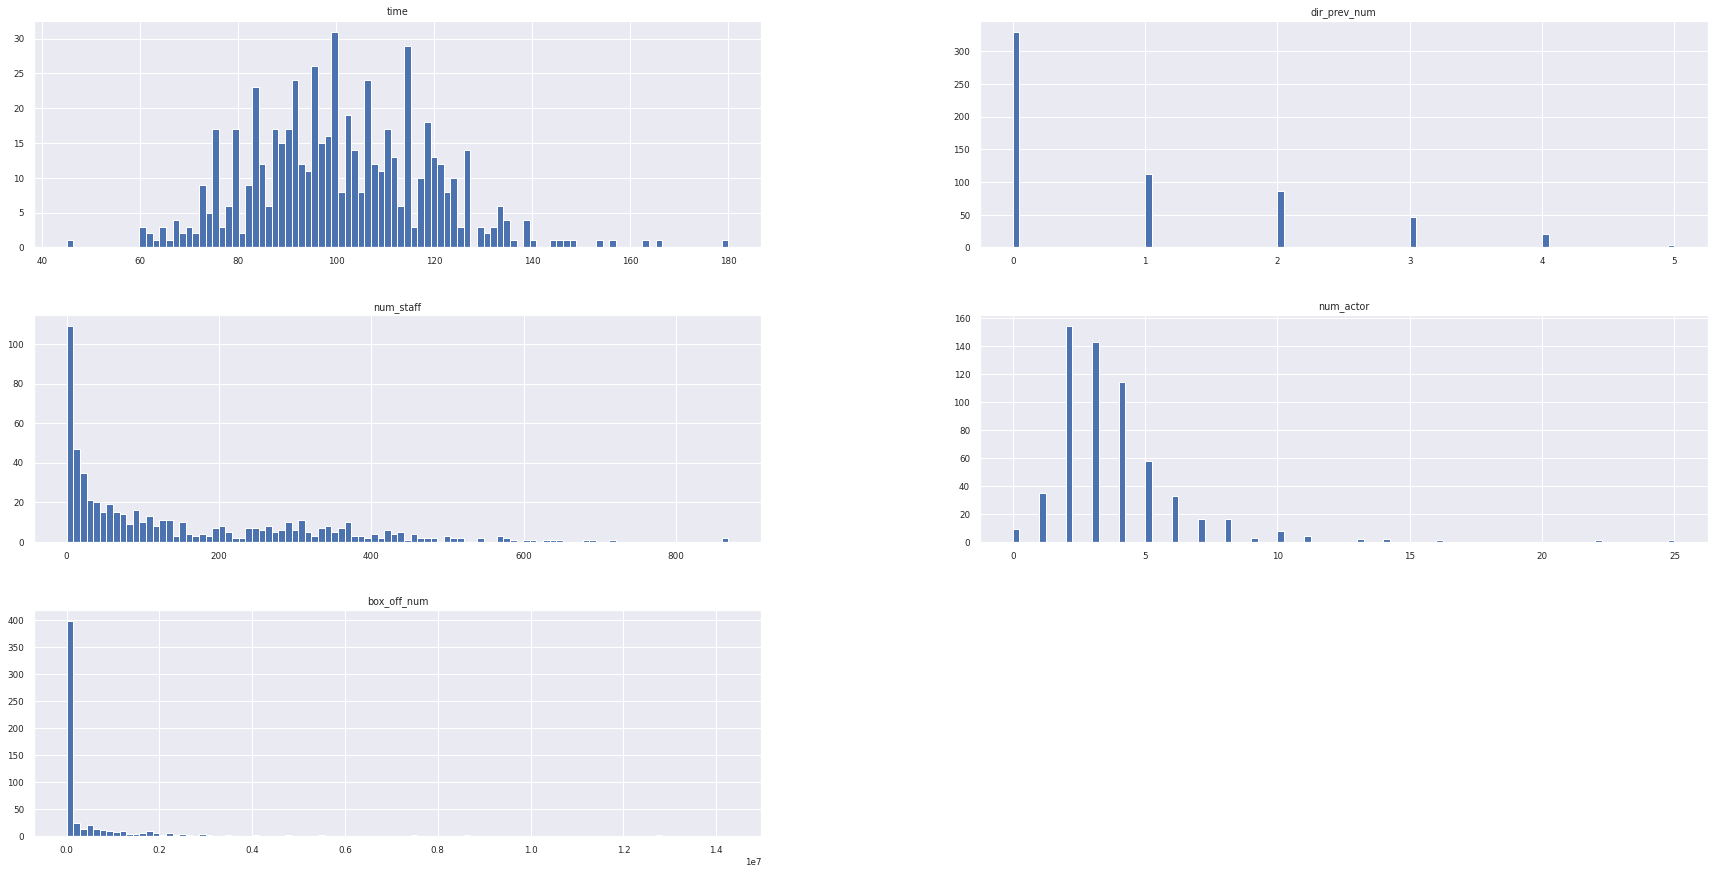

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
train.hist(bins=100, figsize=(30,15))
plt.show()

In [115]:
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))


In [116]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [117]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [118]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [119]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [120]:
pred = model.predict(test)

In [121]:
submission = pd.read_csv('/content/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [122]:
submission['box_off_num'] = pred

In [123]:
submission

,title,box_off_num
0,용서는 없다,2812787.27
1,아빠가 여자를 좋아해,1939663.64
2,하모니,1480873.84
3,의형제,1673628.20
4,평행 이론,1145029.02
...,...,...
238,해에게서 소년에게,145207.34
239,울보 권투부,3186.72
240,어떤살인,386090.65
241,말하지 못한 비밀,10062.97


In [124]:
submission.to_csv('베이스라인.csv',index = False)